# 1D Kalman Filter Simulation for a Radio-Controlled Toy Car

In this notebook, we simulate the application of a Kalman Filter to estimate the position of a radio-controlled toy car that moves along a straight line with constant velocity. The Kalman Filter integrates noisy measurements to estimate the true position more accurately over time.


In [40]:
# Import necessary Python libraries for the simulation and visualization
import numpy as np
import matplotlib.pyplot as plt


## Configuration of Simulation Parameters

Define the basic parameters for the simulation, including the time step, total simulation time, and the velocity of the car. These parameters will control the dynamics of our simulation and the granularity of time steps.


In [41]:
# Constants
dt = 0.1  # time step (seconds)
time_end = 10  # total time of simulation (seconds)
n_steps = int(time_end / dt)  # number of time steps

# Parameters
true_velocity = 0.5  # constant velocity of the car (m/s)
initial_position = 0  # initial position (meters)
process_noise_variance = 0.01  # process noise (variance)
measurement_noise_variance = 0.1  # measurement noise (variance)
initial_estimate_error_variance = 1  # initial error covariance


## Initialization of State Variables

Initialize the arrays to store true positions, measurements, and estimated positions. Set the initial conditions for the simulation, including the initial true position and the first measurement.


In [42]:
# Initialization
x_true = np.zeros(n_steps)  # true position array
z = np.zeros(n_steps)  # measurement array
x_est = np.zeros(n_steps)  # estimated position array
x_est[0] = initial_position  # initial estimate of position
P = np.zeros(n_steps)  # error covariance array
P[0] = initial_estimate_error_variance  # initial error covariance
K = np.zeros(n_steps)  # Kalman gain array

# Generate true position and measurements
x_true[0] = initial_position
z[0] = x_true[0] + np.random.normal(0, np.sqrt(measurement_noise_variance))
for k in range(1, n_steps):
    x_true[k] = x_true[k-1] + true_velocity * dt  # Update true position
    z[k] = x_true[k] + np.random.normal(0, np.sqrt(measurement_noise_variance))  # Simulate noisy measurement


## Kalman Filter Implementation

Implement the Kalman Filter through its two main phases: prediction and update. We will predict the next state based on the current estimate and then update this prediction using the new measurement. This iterative process refines the estimates of the car's position.


In [43]:
# Kalman Filter implementation
for k in range(1, n_steps):
    # Predict
    x_pred = x_est[k-1] + true_velocity * dt  # State prediction
    P_pred = P[k-1] + process_noise_variance  # Covariance prediction
    
    # Update
    K[k] = P_pred / (P_pred + measurement_noise_variance)  # Compute Kalman Gain
    x_est[k] = x_pred + K[k] * (z[k] - x_pred)  # Update state estimate
    P[k] = (1 - K[k]) * P_pred  # Update error covariance


## Visualization of Results

Plot the true position, the measurements, and the Kalman filter estimates over time. This visualization will help us compare how closely the Kalman filter estimates track the true motion of the toy car despite the noisy measurements.


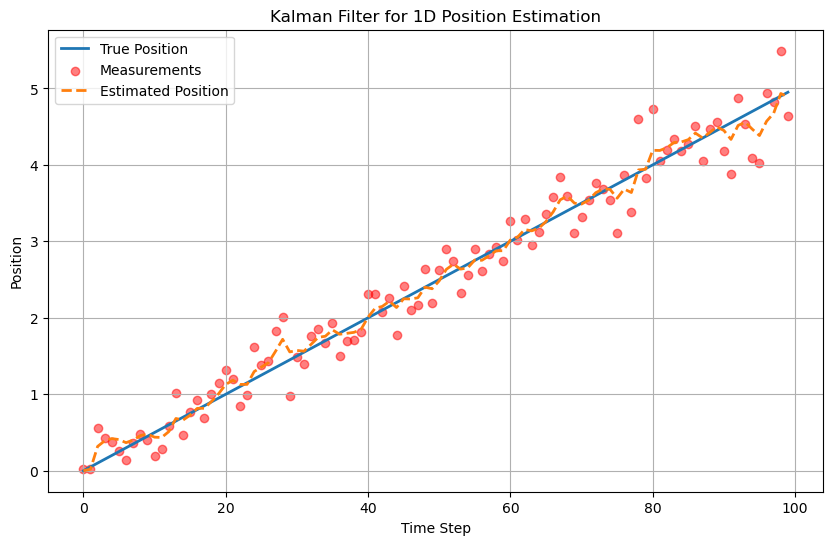

In [44]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x_true, label='True Position', linewidth=2)
plt.scatter(range(n_steps), z, color='r', label='Measurements', alpha=0.5)
plt.plot(x_est, label='Estimated Position', linestyle='--', linewidth=2)
plt.title('Kalman Filter for 1D Position Estimation')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend()
plt.grid(True)
plt.show()


## Statistical Comparison

To quantify the performance of the Kalman Filter, we calculate the Mean Squared Error (MSE) between the true positions and the measured positions, and between the true positions and the estimated positions. Lower MSE values indicate better accuracy of the estimates.


In [45]:
# Calculate Mean Squared Error (MSE)
mse_measurement = np.mean((x_true - z) ** 2)
mse_estimation = np.mean((x_true - x_est) ** 2)

# Display the MSE results
print("Mean Squared Error of Measurements: {:.4f}".format(mse_measurement))
print("Mean Squared Error of Kalman Filter Estimates: {:.4f}".format(mse_estimation))


Mean Squared Error of Measurements: 0.0790
Mean Squared Error of Kalman Filter Estimates: 0.0121


## Enhanced Visualization

This visualization includes the true position, noisy measurements, and Kalman filter estimates, along with the error bars showing the estimated uncertainty at each step. This plot helps to visually assess the precision and accuracy improvements provided by the Kalman Filter.


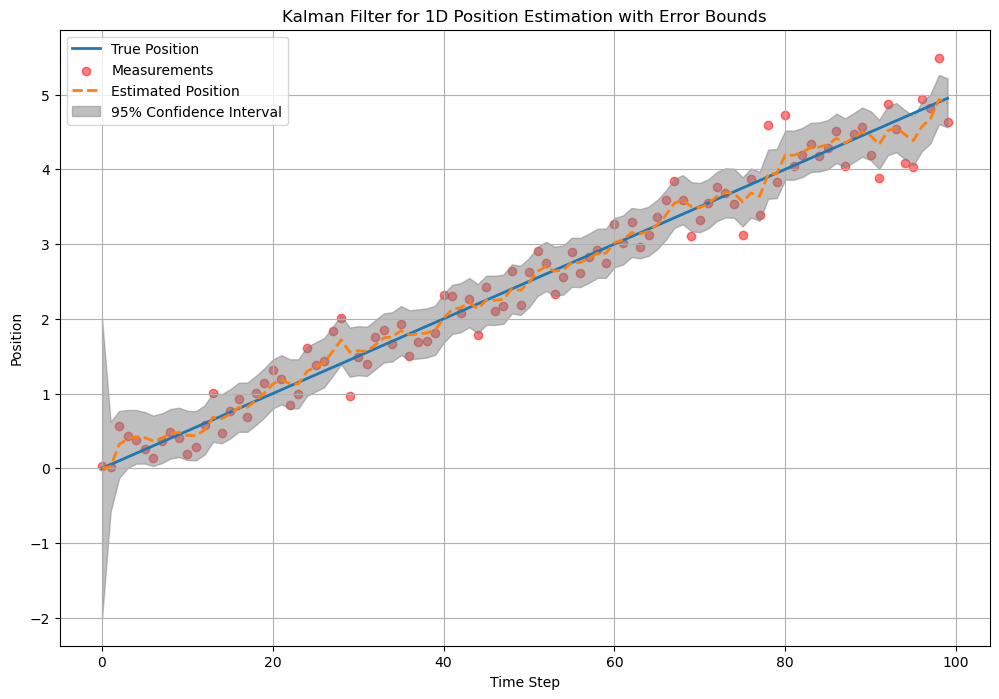

In [46]:
# Plotting results with error visualization
plt.figure(figsize=(12, 8))
plt.plot(x_true, label='True Position', linewidth=2)
plt.scatter(range(n_steps), z, color='r', label='Measurements', alpha=0.5)
plt.plot(x_est, label='Estimated Position', linestyle='--', linewidth=2)
plt.fill_between(range(n_steps), x_est - 2*np.sqrt(P), x_est + 2*np.sqrt(P), color='gray', alpha=0.5, label='95% Confidence Interval')
plt.title('Kalman Filter for 1D Position Estimation with Error Bounds')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

The implementation and simulation of the 1D Kalman Filter for estimating the position of a radio-controlled toy car clearly demonstrate the filter's ability to improve the accuracy of state estimates in the presence of noisy measurements. The Kalman Filter effectively combines predictions based on a physical model (constant velocity) with uncertain measurements to provide a more accurate estimation of the car's position.

### Key Takeaways:
- **Error Reduction**: The Mean Squared Error (MSE) calculations reveal that the Kalman Filter significantly reduces the error between the estimated positions and the true positions compared to the raw measurements.
- **Confidence in Estimations**: The inclusion of the 95% confidence intervals around the estimates visually illustrates the uncertainty associated with the Kalman Filter's predictions. These intervals narrow as the filter processes more data, indicating increasing confidence in the estimates over time.
- **Utility in Real-World Scenarios**: This simulation underscores the utility of Kalman Filters in various real-world applications where accurate state estimation is crucial despite inherent measurement uncertainties and process noises, such as in autonomous vehicle navigation, robotics, and aerospace engineering.

This exercise not only validates the theoretical foundation of Kalman Filters but also enhances understanding of their practical applications in improving measurement accuracy in dynamic systems.
